In [21]:
import os
import sys
from pprint import pprint
sys.path.insert(0, '../..')

from process_signals import get_signals, get_df, bg_sizes, stress_list, num_tops

base_path = os.path.join('..', '..', 'acl21_output')

signals = get_signals(base_path, roberta_name='roberta_renamed')
signals_oe = get_signals(base_path, roberta_name='roberta_oe')
signals_oe_2 = get_signals(base_path, roberta_name='roberta_oe/alpha_2.0')
signals_oe_5 = get_signals(base_path, roberta_name='roberta_oe/alpha_5.0')
# summary_df, score2plot, metric2plot, dataset2plot, id_ood_map = get_df(signals)

Oops on large_news_top5_news_rest_probs.npy
Oops on large_imdb_glue_sst2_probs.npy
Oops on large_news_top5_news_rest_msp.npy
Oops on large_imdb_imdb_msp.npy
Oops on large_imdb_c-imdb_msp.npy
Oops on large_imdb_glue_sst2_msp.npy
Oops on large_imdb_yelp_polarity_probs.npy
Oops on large_imdb_yelp_polarity_msp.npy
Oops on large_imdb_c-imdb_probs.npy
Oops on large_news_top5_news_top5_msp.npy


In [23]:
# pprint(list(signals['msp'].keys()))

In [3]:
# summary_df, score2plot, metric2plot, dataset2plot, id_ood_map = get_df(signals)

In [4]:
# signals['msp'][('imdb', 'imdb')].shape, signals['msp'][('imdb', 'yelp_polarity')].shape

In [24]:
pprint(list(signals_oe['msp'].keys()))

[('mnli_travel', 'mnli_government'),
 ('mnli_slate', 'mnli_telephone'),
 ('mnli_travel', 'mnli_fiction'),
 ('imdb', 'glue_sst2'),
 ('mnli_slate', 'mnli_slate'),
 ('mnli_slate', 'mnli_government'),
 ('mnli_government', 'mnli_government'),
 ('mnli_government', 'mnli_slate'),
 ('mnli_telephone', 'mnli_travel'),
 ('yelp_polarity', 'yelp_polarity'),
 ('mnli_travel', 'mnli_travel'),
 ('mnli_travel', 'mnli_slate'),
 ('mnli_telephone', 'mnli_slate'),
 ('news_top5', 'news_top5'),
 ('glue_sst2', 'imdb'),
 ('glue_sst2', 'glue_sst2'),
 ('yelp_polarity', 'glue_sst2'),
 ('mnli_fiction', 'mnli_travel'),
 ('dbpedia_top4', 'dbpedia_rest'),
 ('imdb', 'yelp_polarity'),
 ('mnli_travel', 'mnli_telephone'),
 ('glue_sst2', 'yelp_polarity'),
 ('mnli_telephone', 'mnli_telephone'),
 ('dbpedia_top4', 'dbpedia_top4'),
 ('mnli_slate', 'mnli_fiction'),
 ('news_top5', 'news_rest'),
 ('mnli_fiction', 'mnli_telephone'),
 ('mnli_government', 'mnli_travel'),
 ('yelp_polarity', 'imdb'),
 ('mnli_telephone', 'mnli_governme

In [34]:
test = [1, 2, 3]
print(*test)

1 2 3


In [25]:
from termcolor import colored
# print(colored('hello', 'red'), colored('world', 'green'))
# print(colored("hello red world", 'red'))

In [35]:
import utils
from utils import compute_auroc

def eval_signals_auroc(signals, id_data, ood_data):
    return round(compute_auroc(-signals['msp'][(id_data, id_data)], -signals['msp'][(id_data, ood_data)]), 2)

def eval_both_signals(id_data, ood_data):
    base_score = eval_signals_auroc(signals, id_data, ood_data)
    oe_score = eval_signals_auroc(signals_oe, id_data, ood_data)
    oe_score_2 = eval_signals_auroc(signals_oe_2, id_data, ood_data)
    oe_score_5 = eval_signals_auroc(signals_oe_5, id_data, ood_data)
    return base_score, [oe_score, oe_score_2, oe_score_5]

def print_both_signals(id_data, ood_data):
    base_score, oe_scores = eval_both_signals(id_data, ood_data)
    if base_score > max(oe_scores):
        print(colored(base_score, 'red'), *oe_scores)
    else:
        print(base_score, *[colored(oe_score, 'green') if oe_score == max(oe_scores) else oe_score for oe_score in oe_scores])

In [36]:
print('SST2 vs IMDB:', end=" ")
print_both_signals('glue_sst2', 'imdb')
print('SST2 vs Yelp:', end=" ")
print_both_signals('glue_sst2', 'yelp_polarity')
print()

print('IMDB vs SST2:', end=" ")
print_both_signals('imdb', 'glue_sst2')
print('IMDB vs Yelp:', end=" ")
print_both_signals('imdb', 'yelp_polarity')
print()

print('Yelp vs SST2:', end=" ")
print_both_signals('yelp_polarity', 'glue_sst2')
print('Yelp vs IMDB:', end=" ")
print_both_signals('yelp_polarity', 'imdb')

SST2 vs IMDB: 66.21 68.5 67.42 68.08
SST2 vs Yelp: 57.46 62.63 62.52 60.81

IMDB vs SST2: 82.58 80.98 83.22 83.37
IMDB vs Yelp: 67.15 64.39 71.83 72.48

Yelp vs SST2: 85.89 80.96 82.84 75.76
Yelp vs IMDB: 61.77 57.19 64.31 55.91


In [37]:
print('News Top5 vs News Rest:', end=" ")
print_both_signals('news_top5', 'news_rest')

print('DBPedia Top4 vs DBPedia Rest:', end=" ")
print_both_signals('dbpedia_top4', 'dbpedia_rest')

News Top5 vs News Rest: 78.89 78.34 77.77 78.74
DBPedia Top4 vs DBPedia Rest: 88.83 89.67 89.3 88.97


In [38]:
mnli_genre_negative_idxs = {'mnli_fiction': [79, 185, 476, 508, 573, 594, 677, 686, 748, 836, 1024, 1075, 1110, 1158, 1314, 1359, 1418, 1435, 1458, 1476, 1537, 1561, 1619, 1828, 1848, 1924, 1939],
'mnli_government': [20, 39, 89, 195, 197, 243, 244, 268, 273, 297, 349, 369, 381, 611, 669, 675, 682, 782, 788, 796, 924, 945, 951, 992, 996, 1021, 1056, 1074, 1085, 1121, 1143, 1230, 1233, 1257, 1413, 1443, 1464, 1500, 1540, 1542, 1556, 1569, 1573, 1576, 1590, 1603, 1608, 1612, 1637, 1680, 1698, 1700, 1713, 1845, 1992],
'mnli_slate': [25, 54, 74, 90, 122, 173, 200, 222, 280, 291, 326, 339, 487, 580, 648, 674, 700, 712, 731, 899, 902, 959, 970, 1000, 1056, 1133, 1138, 1147, 1170, 1223, 1247, 1258, 1282, 1316, 1466, 1496, 1497, 1580, 1613, 1651, 1675, 1854, 1942, 1964, 1988],
'mnli_telephone': [155, 216, 257, 349, 368, 414, 479, 636, 675, 741, 755, 925, 968, 1040, 1095, 1168, 1172, 1181, 1212, 1222, 1238, 1371, 1387, 1444, 1554, 1581, 1605, 1713, 1732, 1777, 1856, 1920, 1930, 1987],
'mnli_travel': [34, 139, 148, 273, 455, 537, 585, 800, 807, 808, 970, 1072, 1163, 1210, 1233, 1234, 1239, 1291, 1317, 1358, 1475, 1815, 1904, 1929]}

mnli_genres = list(mnli_genre_negative_idxs.keys())

In [39]:
for id_genre in mnli_genres:
    print(f"\n----{id_genre} vs")
    for ood_genre in mnli_genres:
        if id_genre == ood_genre:
            continue
#         res = eval_signals_auroc(signals, id_genre, ood_genre)
        print(f"{ood_genre}:", end=" ")
        print_both_signals(id_genre, ood_genre)


----mnli_fiction vs
mnli_government: 48.54 56.75 48.95 49.27
mnli_slate: 54.07 60.45 53.66 54.13
mnli_telephone: 50.96 58.09 51.47 50.95
mnli_travel: 49.94 59.68 50.75 51.77

----mnli_government vs
mnli_fiction: 57.44 61.13 59.62 59.71
mnli_slate: 58.29 61.09 58.82 59.0
mnli_telephone: 57.62 62.06 58.99 60.3
mnli_travel: 57.12 59.43 56.75 56.62

----mnli_slate vs
mnli_fiction: 48.21 52.33 49.25 49.06
mnli_government: 45.3 46.82 44.11 44.67
mnli_telephone: 49.76 55.09 51.04 51.78
mnli_travel: 46.83 51.09 47.44 47.66

----mnli_telephone vs
mnli_fiction: 55.85 56.98 58.37 56.75
mnli_government: 52.53 54.43 53.86 54.13
mnli_slate: 59.17 59.61 60.34 59.24
mnli_travel: 56.81 57.1 58.39 57.38

----mnli_travel vs
mnli_fiction: 54.75 59.11 61.36 57.92
mnli_government: 49.0 49.32 50.05 48.8
mnli_slate: 55.75 57.89 59.98 57.67
mnli_telephone: 56.02 57.86 60.47 55.75


In [9]:
# print('SST2 vs IMDB:', eval_signals_auroc(signals, 'glue_sst2', 'imdb'))
# print('SST2 vs Yelp:', eval_signals_auroc(signals, 'glue_sst2', 'yelp_polarity'))
# print()

# print('IMDB vs SST2:', eval_signals_auroc(signals, 'imdb', 'glue_sst2'))
# print('IMDB vs Yelp:', eval_signals_auroc(signals, 'imdb', 'yelp_polarity'))
# print()

# print('Yelp vs SST2:', eval_signals_auroc(signals, 'yelp_polarity', 'glue_sst2'))
# print('Yelp vs IMDB:', eval_signals_auroc(signals, 'yelp_polarity', 'imdb'))

In [11]:
# print('News Top5 vs News Rest:', eval_signals_auroc(signals, 'news_top5', 'news_rest'))
# print('DBPedia Top4 vs DBPedia Rest:', eval_signals_auroc(signals, 'dbpedia_top4', 'dbpedia_rest'))

In [37]:
for id_genre in mnli_genres:
    print(f"\n----{id_genre} vs")
    for ood_genre in mnli_genres:
        if id_genre == ood_genre:
            continue
        res = eval_signals_auroc(signals, id_genre, ood_genre)
        print(f"{ood_genre}: {res}")


----mnli_fiction vs
mnli_government: 56.75
mnli_slate: 60.45
mnli_telephone: 58.09
mnli_travel: 59.68

----mnli_government vs
mnli_fiction: 61.13
mnli_slate: 61.09
mnli_telephone: 62.06
mnli_travel: 59.43

----mnli_slate vs
mnli_fiction: 52.33
mnli_government: 46.82
mnli_telephone: 55.09
mnli_travel: 51.09

----mnli_telephone vs
mnli_fiction: 56.98
mnli_government: 54.43
mnli_slate: 59.61
mnli_travel: 57.1

----mnli_travel vs
mnli_fiction: 59.11
mnli_government: 49.32
mnli_slate: 57.89
mnli_telephone: 57.86


### AUROC curves

In [46]:
import matplotlib.pyplot as plt

def show_curve(signals, id_name, ood_name):
    fpr, tpr, thresholds = compute_auroc(-signals['msp'][(id_name, id_name)], -signals['msp'][(id_name, ood_name)], return_curve=True)
    score = compute_auroc(-signals['msp'][(id_name, id_name)], -signals['msp'][(id_name, ood_name)], return_curve=False)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic - {id_name} vs {ood_name}')
    plt.legend(loc="lower right")
    plt.show()

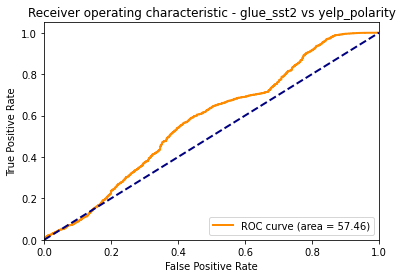

In [47]:
show_curve(signals, 'glue_sst2', 'yelp_polarity')

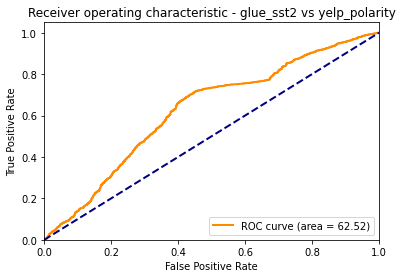

In [48]:
show_curve(signals_oe_2, 'glue_sst2', 'yelp_polarity')

### Beta curve

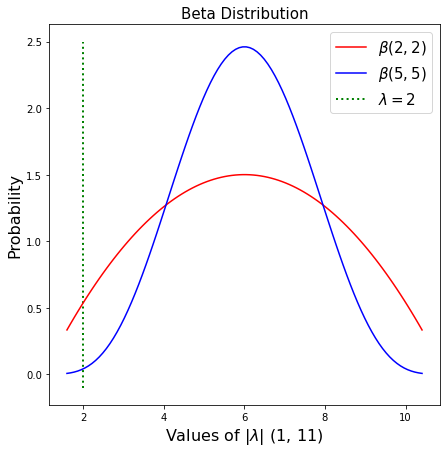

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
#
# Set the shape paremeters
#
a, b = 2, 2
#
# Generate the value between
#
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
#
# Plot the beta distribution
#
plt.figure(figsize=(7,7))
# plt.xlim(0.7, 1)
plt.plot(1 + 10*x, beta.pdf(x, 2, 2), 'r-', label=r'$\beta(2,2)$')
plt.plot(1 + 10*x, beta.pdf(x, 5, 5), 'b-', label=r'$\beta(5,5)$')
plt.vlines(x=2, ymin=-0.1, ymax=2.5, colors='green', ls=':', lw=2, label=r'$\lambda=2$')
plt.title('Beta Distribution', fontsize='15')
plt.xlabel(r'Values of $|\lambda|$ (1, 11)', fontsize='16')
plt.ylabel('Probability', fontsize='16')
plt.legend(fontsize=15)
plt.show()